# 1. EDA

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score
import time

In [ ]:
# Giai đoạn 1: Khám Phá Dữ Liệu (EDA)

# 1. Nạp dữ liệu
data = pd.read_csv('/content/drive/MyDrive/GG Colab/Diabetes/diabetes_prediction_dataset.csv')

# 2. Xem thông tin cơ bản của dữ liệu
print("Thông tin dữ liệu:")
print(data.info())
print("\nKiểm tra giá trị thiếu:")
print(data.isnull().sum())

# 3. Phân bố biến mục tiêu 'diabetes'
print("\nPhân bố biến mục tiêu 'diabetes':")
print(data['diabetes'].value_counts())
print("\nTỷ lệ phần trăm của 'diabetes':")
print(data['diabetes'].value_counts(normalize=True))

# 4. Phân bố của 'smoking_history'
print("\nPhân bố của 'smoking_history':")
print(data['smoking_history'].value_counts())
print("\nTỷ lệ phần trăm của 'smoking_history':")
print(data['smoking_history'].value_counts(normalize=True))

# 5. Phân bố của 'gender'
print("\nPhân bố của 'gender':")
print(data['gender'].value_counts())
print("\nTỷ lệ phần trăm của 'gender':")
print(data['gender'].value_counts(normalize=True))

# 6. Mô tả các cột số
print("\nMô tả các cột số:")
print(data.describe())

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

Kiểm tra giá trị thiếu:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes           

Ánh xạ của 'gender':
{'Female': np.int64(0), 'Male': np.int64(1), 'Other': np.int64(2)}

Ánh xạ của 'smoking_history':
{'No Info': np.int64(0), 'current': np.int64(1), 'ever': np.int64(2), 'former': np.int64(3), 'never': np.int64(4), 'not current': np.int64(5)}


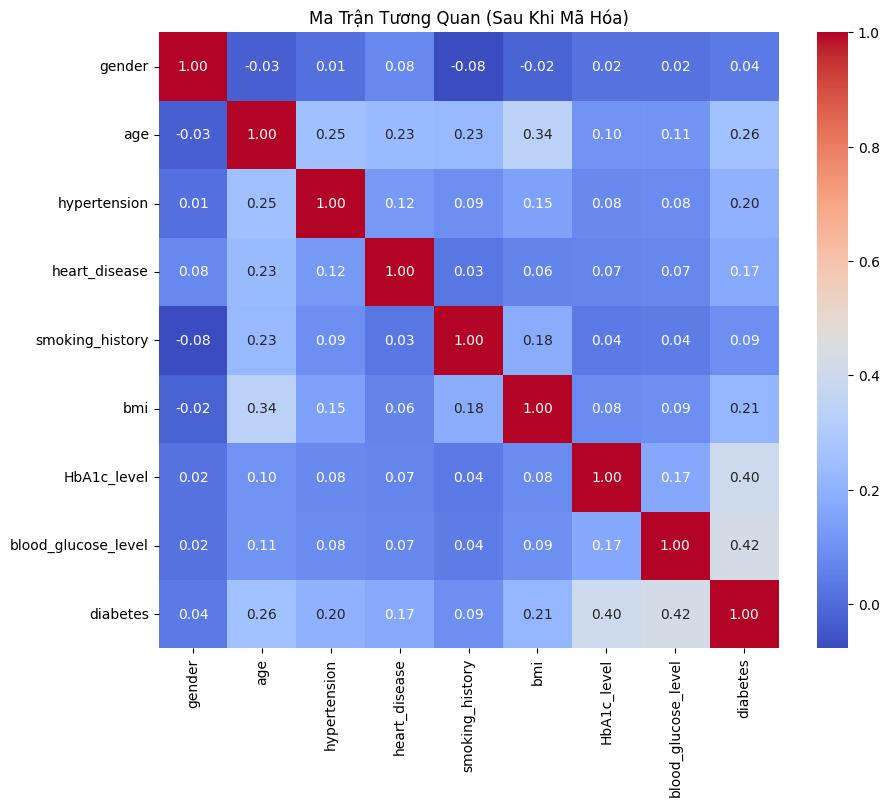


Tương quan của các đặc trưng với 'diabetes':
diabetes               1.000000
blood_glucose_level    0.419558
HbA1c_level            0.400660
age                    0.258008
bmi                    0.214357
hypertension           0.197823
heart_disease          0.171727
smoking_history        0.094290
gender                 0.037411
Name: diabetes, dtype: float64


In [ ]:
# Mã hóa biến phân loại để tính tương quan
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Mã hóa 'gender'
data['gender'] = le.fit_transform(data['gender'])
print("Ánh xạ của 'gender':")
print(dict(zip(le.classes_, le.transform(le.classes_))))

# Mã hóa 'smoking_history'
data['smoking_history'] = le.fit_transform(data['smoking_history'])
print("\nÁnh xạ của 'smoking_history':")
print(dict(zip(le.classes_, le.transform(le.classes_))))

# Tính ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma Trận Tương Quan (Sau Khi Mã Hóa)')
plt.show()

# Tương quan với 'diabetes'
print("\nTương quan của các đặc trưng với 'diabetes':")
print(data.corr()['diabetes'].sort_values(ascending=False))

# 2. Tiền xử lý


In [ ]:
# Giai đoạn 2: Tiền Xử Lý Dữ Liệu (Tiếp Tục)

# 1. Mã hóa biến phân loại
le = LabelEncoder()

# Mã hóa 'gender'
data['gender'] = le.fit_transform(data['gender'])
print("Ánh xạ của 'gender':")
gender_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(gender_mapping)

# Mã hóa 'smoking_history'
data['smoking_history'] = le.fit_transform(data['smoking_history'])
print("\nÁnh xạ của 'smoking_history':")
smoking_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(smoking_mapping)

# 2. Loại bỏ giá trị bất thường (tùy chọn)
data = data[data['bmi'] <= 60]  # Loại bỏ BMI > 60
print("Số dòng sau khi loại bỏ BMI bất thường:", len(data))

# 3. Chuẩn hóa đặc trưng số
scaler = StandardScaler()
numerical_cols = ['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Kiểm tra dữ liệu sau tiền xử lý
print("\nDữ liệu sau khi mã hóa và chuẩn hóa:")
print(data.head())
print("\nKiểu dữ liệu sau tiền xử lý:")
print(data.dtypes)

Ánh xạ của 'gender':
{np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2)}

Ánh xạ của 'smoking_history':
{np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5)}
Số dòng sau khi loại bỏ BMI bất thường: 99885

Dữ liệu sau khi mã hóa và chuẩn hóa:
   gender       age  hypertension  heart_disease  smoking_history       bmi  \
0       0  1.692264             0              1                4 -0.320863   
1       0  0.537954             0              0                0  0.006854   
2       1 -0.616357             0              0                4  0.006854   
3       0 -0.261184             0              0                1 -0.588576   
4       1  1.514678             1              1                1 -1.097845   

   HbA1c_level  blood_glucose_level  diabetes  
0     1.002594             0.048217         0  
1     1.002594            -1.426549         0  
2     0.1

<ipython-input-3-6bd7bc7eb25b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


# 3. Phân chia tập dữ liệu

In [ ]:
# Giai đoạn 3: Chia Dữ Liệu và Xử Lý Mất Cân Bằng

# 1. Chia dữ liệu
X = data.drop('diabetes', axis=1)
y = data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kiểm tra kích thước
print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)

# Kiểm tra phân bố ban đầu
print("\nPhân bố lớp trong tập huấn luyện ban đầu:")
print(y_train.value_counts())
print("\nTỷ lệ phần trăm trong tập huấn luyện ban đầu:")
print(y_train.value_counts(normalize=True))

# 2. Xử lý mất cân bằng bằng SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Kiểm tra phân bố sau SMOTE
print("\nPhân bố lớp trong tập huấn luyện sau SMOTE:")
print(pd.Series(y_train_res).value_counts())
print("\nTỷ lệ phần trăm trong tập huấn luyện sau SMOTE:")
print(pd.Series(y_train_res).value_counts(normalize=True))

Kích thước tập huấn luyện: (79908, 8)
Kích thước tập kiểm tra: (19977, 8)

Phân bố lớp trong tập huấn luyện ban đầu:
diabetes
0    73145
1     6763
Name: count, dtype: int64

Tỷ lệ phần trăm trong tập huấn luyện ban đầu:
diabetes
0    0.915365
1    0.084635
Name: proportion, dtype: float64

Phân bố lớp trong tập huấn luyện sau SMOTE:
diabetes
0    73145
1    73145
Name: count, dtype: int64

Tỷ lệ phần trăm trong tập huấn luyện sau SMOTE:
diabetes
0    0.5
1    0.5
Name: proportion, dtype: float64


# 4. Chọn các mô hình

In [ ]:
# Giai đoạn 4: Chọn Các Mô Hình

# Khởi tạo các mô hình
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'SVM': SVC(random_state=42, class_weight='balanced', probability=True)
}

print("Các mô hình đã khởi tạo:")
for name in models.keys():
    print(f"- {name}")

Các mô hình đã khởi tạo:
- Logistic Regression
- K-Nearest Neighbors
- Random Forest
- SVM


# 5. Huấn luyện và Đánh giá


In [ ]:
# Giai đoạn 5: Huấn Luyện và Đánh Giá Mô Hình

# Huấn luyện và đánh giá từng mô hình
results = {}

for name, model in models.items():
    print(f"\n=== Kết Quả Mô Hình: {name} ===")

    # Đo thời gian huấn luyện
    start_time = time.time()
    model.fit(X_train_res, y_train_res)
    training_time = time.time() - start_time

    # Dự đoán
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Đánh giá
    print(f"Thời gian huấn luyện: {training_time:.2f} giây")
    print("Classification Report:")
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_prob)
    print("ROC-AUC:", roc_auc)

    # Lưu kết quả
    results[name] = {
        'Accuracy': report['accuracy'],
        'Recall (Class 1)': report['1']['recall'],
        'F1-score (Class 1)': report['1']['f1-score'],
        'ROC-AUC': roc_auc,
        'Training Time': training_time
    }

# So sánh các mô hình
results_df = pd.DataFrame(results).T
print("\n=== So Sánh Các Mô Hình ===")
print(results_df)


=== Kết Quả Mô Hình: Logistic Regression ===
Thời gian huấn luyện: 0.23 giây
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18277
           1       0.42      0.89      0.57      1700

    accuracy                           0.89     19977
   macro avg       0.71      0.89      0.75     19977
weighted avg       0.94      0.89      0.90     19977

ROC-AUC: 0.9611486310341831

=== Kết Quả Mô Hình: K-Nearest Neighbors ===
Thời gian huấn luyện: 0.25 giây
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     18277
           1       0.49      0.81      0.61      1700

    accuracy                           0.91     19977
   macro avg       0.74      0.87      0.78     19977
weighted avg       0.94      0.91      0.92     19977

ROC-AUC: 0.9151226388678796

=== Kết Quả Mô Hình: Random Forest ===
Thời gian huấn luyện: 13.38 giây
Classification 

In [ ]:
# Giai đoạn 6: Huấn Luyện Mô Hình XGBoost

# Tính scale_pos_weight để ưu tiên lớp 1 (tăng recall)
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)  # Tỷ lệ lớp 0 / lớp 1
print(f"Scale_pos_weight: {scale_pos_weight}")

# Khởi tạo mô hình XGBoost
xgb_model = xgb.XGBClassifier(
    random_state=42,
    scale_pos_weight=scale_pos_weight,  # Tăng trọng số cho lớp 1
    objective='binary:logistic',
    eval_metric='logloss'
)

# Đo thời gian huấn luyện
start_time = time.time()
xgb_model.fit(X_train_res, y_train_res)
training_time = time.time() - start_time

# Dự đoán
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Đánh giá
print("\n=== Kết Quả Mô Hình: XGBoost ===")
print(f"Thời gian huấn luyện: {training_time:.2f} giây")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

# Lưu kết quả để so sánh
results_xgb = {
    'Accuracy': classification_report(y_test, y_pred_xgb, output_dict=True)['accuracy'],
    'Recall (Class 1)': classification_report(y_test, y_pred_xgb, output_dict=True)['1']['recall'],
    'F1-score (Class 1)': classification_report(y_test, y_pred_xgb, output_dict=True)['1']['f1-score'],
    'ROC-AUC': roc_auc_score(y_test, y_prob_xgb),
    'Training Time': training_time
}

# So sánh với các mô hình trước
# results_df['XGBoost'] = results_xgb
# print("\n=== So Sánh Các Mô Hình (bao gồm XGBoost) ===")
print(results_xgb)

Scale_pos_weight: 10.815466508945734

=== Kết Quả Mô Hình: XGBoost ===
Thời gian huấn luyện: 4.19 giây
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18277
           1       0.44      0.91      0.59      1700

    accuracy                           0.89     19977
   macro avg       0.71      0.90      0.76     19977
weighted avg       0.94      0.89      0.91     19977

ROC-AUC: 0.9748876762501247
{'Accuracy': 0.8924262902337688, 'Recall (Class 1)': 0.9123529411764706, 'F1-score (Class 1)': 0.5907446200723672, 'ROC-AUC': np.float64(0.9748876762501247), 'Training Time': 4.193905830383301}
